## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = mouse_metadata.merge(study_results)
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
total_mice = merged_df['Mouse ID'].nunique()
total_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = merged_df[merged_df.duplicated(["Mouse ID"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df.drop(merged_df[merged_df["Mouse ID" ]== "z969"].index, inplace=True)

In [7]:
# Checking the number of mice in the clean DataFrame.
new_total_mice = merged_df['Mouse ID'].count()
new_total_mice

#unique mice
unique_mice = merged_df['Mouse ID'].nunique()
unique_mice


248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regime_grouped = merged_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume.
tvol = regime_grouped['Tumor Volume (mm3)']

tvol_mean = tvol.mean()
tvol_mean

tvol_median = tvol.median()
tvol_median

tvol_var = tvol.var()
tvol_var

tvol_std = tvol.std()
tvol_std

###### Assemble the resulting series into a single summary dataframe. ????
summary_stats_df = pd.DataFrame({"Mean": tvol_mean, 
                                    "Median": tvol_median,
                                    "Variance": tvol_var,
                                     "Standard Deviation" : tvol_std})


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats_df = pd.DataFrame({"Mean": tvol_mean, 
                                    "Median": tvol_median,
                                    "Variance": tvol_var,
                                     "Standard Deviation" : tvol_std})
summary_stats_df
###### Using the aggregation method, produce the same summary statistics in a single line ????


,Mean,Median,Variance,Standard Deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,53.998435,51.938261,63.012382,7.938034
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.322552,50.854632,42.351070,6.507770
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


## Bar and Pie Charts

Text(0, 0.5, 'Number of Timepoints')

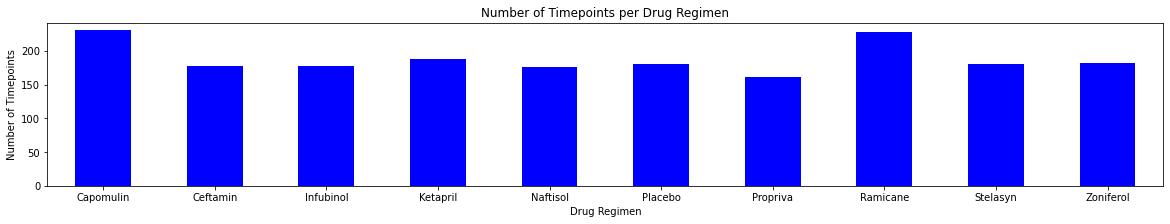

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#set variables
timepoint = regime_grouped['Timepoint']
drug_names = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
total_timepoint = timepoint.count()
x_values1 = range(len(total_timepoint))
tick_locations = [value for value in x_values1]

#create bar graph
total_timepoint.plot(kind="bar", figsize=(20,3), rot=0, color='blue')
plt.title("Number of Timepoints per Drug Regimen")
plt.ylabel("Number of Timepoints")

Text(0, 0.5, 'Number of Timepoints')

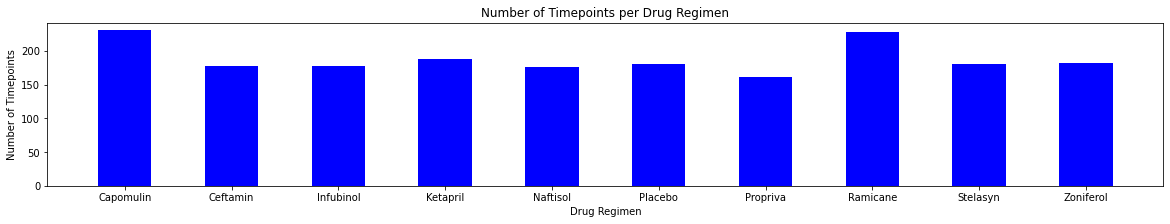

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(20,3))
plt.bar(x_values1, total_timepoint, color='blue', width=0.5)
plt.xticks(tick_locations, drug_names)
plt.title("Number of Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")


Text(0, 0.5, ' ')

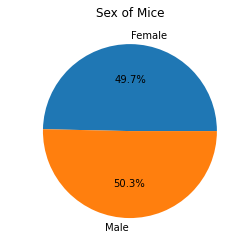

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#make new df based on sex
sex_grouped = merged_df.groupby('Sex')
mouse_ID = sex_grouped['Mouse ID']
sex = mouse_ID.count()
sex

sex.plot(kind="pie", autopct='%1.1f%%', title='Sex of Mice')
plt.ylabel(" ")
#######fix percentages

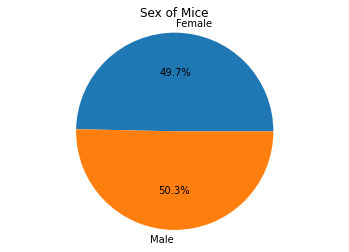

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Sex of Mice")
plt.pie(sex, labels=['Female', 'Male'],
        autopct="%1.1f%%")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
id_grouped = merged_df.groupby('Mouse ID')
greatest_tp = id_grouped['Timepoint'].max()
greatest_tp_df = pd.DataFrame(greatest_tp)
greatest_tp_df


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tp_df = pd.merge(merged_df, greatest_tp_df, on=['Timepoint',"Mouse ID"])
final_tp_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z234,Naftisol,Female,19,27,5,46.129357,1
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

drug_t_val = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_regimen:
    t_vol2 = final_tp_df[final_tp_df["Drug Regimen"] == drug]['Tumor Volume (mm3)']
    drug_t_val.append(t_vol2)
 
    # add subset 

    
    # Determine outliers using upper and lower bounds    
quartiles = t_vol2.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The the median of tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x7faea09be1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7faea09be820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faea09b5d30>,
 'medians': [<matplotlib.lines.Line2D at 0x7faeb1318bb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7faea09bed30>,
 'means': []}

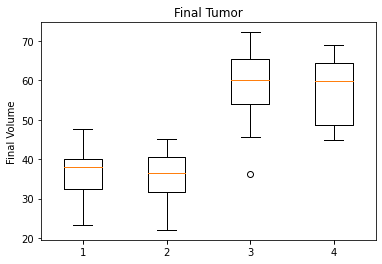

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.title('Final Tumor')
plt.ylabel('Final Volume')
plt.boxplot(drug_t_val)

## Line and Scatter Plots

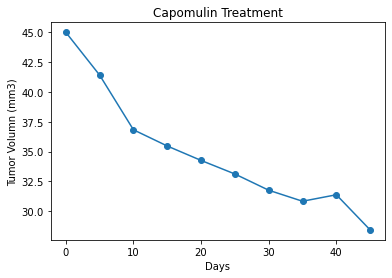

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = merged_df[merged_df['Mouse ID'] == 'm601']
mouse
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')
plt.xlabel('Days')
plt.ylabel('Tumor Volumn (mm3)')
plt.title('Capomulin Treatment')
plt.show()

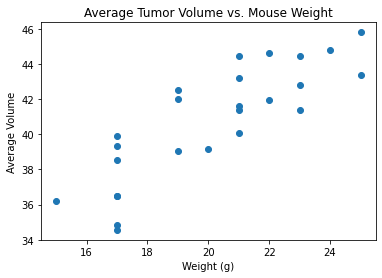

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#pull out Capomulin
capomulin_df = merged_df[merged_df['Drug Regimen'] == 'Capomulin']
capomulin_df

#group by Mouse ID
copomulin_grouped = capomulin_df.groupby('Mouse ID')

#find average tumor volume
avg_volume = copomulin_grouped['Tumor Volume (mm3)'].mean()
avg_volume

#merge databases
avg_volume = pd.merge(capomulin_df, avg_volume, on='Mouse ID')
avg_volume

#create new df
final_volume = avg_volume[['Weight (g)', 'Tumor Volume (mm3)_y']].drop_duplicates()
final_volume

x_values = final_volume['Weight (g)']
y_values = final_volume['Tumor Volume (mm3)_y']
plt.scatter(x_values, y_values)

plt.xlabel("Weight (g)")
plt.ylabel("Average Volume")
plt.title('Average Tumor Volume vs. Mouse Weight')

plt.show()

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = capomulin_df.groupby(capomulin_df["Mouse ID"])["Weight (g)"].mean()
y_values = capomulin_df.groupby(capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()

print(f"The correlation coefficient between mouse weight and is {round(st.pearsonr(x_values,y_values)[0],2)}")

NameError: name 'linregress' is not defined